# JORDI BLASCO LOZANO

# 9.0 NetworkX
## 9.1, 9.2 Instalacion y Importaciones de paquetes

In [174]:
# importamos todas la librerias que vayamos a usar y leemos el data set

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

WPCdata = pd.read_csv('dataset.csv')
# muestro el data set para tener mas claro las columnas de la tabla y trabajar mejor
WPCdata

,equipoID,nombreEq,nombreJug1,nombreJug2,sets_ganados,sets_perdidos,partidos_ganados,partidos_perdidos,enfrentamientos,puntos,puntos_por_jornada,dineroGenerado,mediaEspectadoresPorEquipo,entradasVendidasPorEquipo,pais
0,1,electroingenieros,Juan,Pedrito,11,7,4,3,"[2, 4, 3, 10, 5, 7, 6]",8,"[0, 2, 2, 4, 4, 4, 6, 8]",650,550,100,España
1,2,termonuecleares,Pedro,Adrian,11,7,4,3,"[1, 8, 10, 7, 4, 6, 9]",8,"[0, 0, 0, 2, 4, 4, 6, 8]",700,405,80,EEUU
2,3,ElPAPITO,Pablo,Elena,7,10,3,4,"[4, 9, 1, 6, 7, 5, 10]",6,"[0, 0, 2, 2, 2, 4, 4, 6]",600,900,90,China
3,4,LosPibes,Elena,Blanca,12,5,6,1,"[3, 1, 5, 8, 2, 10, 7]",12,"[0, 2, 4, 6, 6, 8, 10, 12]",1200,830,70,URS
4,5,herculanos,Carlos,Ana,9,10,3,4,"[6, 10, 4, 9, 1, 3, 8]",6,"[0, 0, 2, 2, 2, 4, 6, 6]",600,450,100,China
5,6,Palilleros,Federico,Carlos,11,7,5,2,"[5, 7, 8, 3, 9, 2, 1]",10,"[0, 2, 4, 6, 8, 10, 10, 10]",950,670,80,Nepal
6,7,MaurosTeam,Mauro,Alex,5,11,2,5,"[8, 6, 9, 2, 3, 1, 4]",4,"[0, 0, 0, 2, 2, 2, 2, 4]",500,880,90,R.D. Congo
7,8,ParricaElMejor,Parra,Teresa,7,11,3,4,"[7, 2, 6, 4, 10, 9, 5]",6,"[0, 2, 4, 4, 6, 6, 6, 6]",600,550,100,España
8,9,Ganadores,Gonzalo,Paco,8,9,3,4,"[10, 3, 7, 5, 6, 8, 2]",6,"[0, 2, 2, 2, 4, 4, 6, 6]",1150,950,120,China
9,10,UltraTeam,Sara,Luis,7,11,2,5,"[9, 5, 2, 1, 8, 4, 3]",4,"[0, 0, 0, 0, 2, 4, 4, 4]",600,800,80,Nigeria


# 9.3 Creacion de un grafo
 creamos un grafo vacion con nx.Graph() 

In [175]:
G = nx.Graph() # grafo no dirigido
print(G)
G = nx.DiGraph() # grafo dirigido
print(G)

Graph with 0 nodes and 0 edges
DiGraph with 0 nodes and 0 edges


## 9.3.1 Creacion de un grafo desde una matriz numpy

In [176]:
G = nx.Graph(np.array([[0, 1, 1], [1, 0, 1], [0, 1, 0]])) # usamos una matriz de adyacencia para crear el grafo
print(G)
print(G.nodes) # mostramos los nodos del grafo
print(G.edges) # mostramos las conexiones
print(nx.adjacency_matrix(G).todense()) # mostramos la matriz de adyacencia

Graph with 3 nodes and 3 edges
[0, 1, 2]
[(0, 1), (0, 2), (1, 2)]
[[0 1 1]
 [1 0 1]
 [1 1 0]]


## 9.3.2 Creacion de un grafo desde un pandas DataFrame
Usaré una combinación de las dos maneras de crear un grafo de manera mas complicada, por lo que para la version facil de este apartado usare un pandas inventado y para la version complicada usare el data set de padelWoldCup 

In [177]:
df = pd.DataFrame({'from': [1, 2, 3, 4], 'to': [3, 3, 4, 2]}) # creamos un data frame con dos columnas from y to donde cada fila sera un nodo y con su conexion de la columna to
G = nx.from_pandas_edgelist(df, 'from', 'to')
print(G.nodes)
print(G.edges)

[1, 3, 2, 4]
[(1, 3), (3, 2), (3, 4), (2, 4)]


## 9.3.2.1 Creacion de un grafo desde un pandas DataFrame version compleja + 
### 9.3.3, 9.3.4 Añadir nodos y conexiones
Para este apartado voy a definir primero las dos variables que necesito, (seran de tipo np.array). Primero definire todos los nodos ('equipoID') y despues las conexiones ('enfrentamientos'). Creare un grafo vacio no dirigido y añadire los nodos, por ultimo con dos bucles anidados añadire las conexiones que representaran los enfrentamientos de cada equipo.

In [178]:

equipoID = np.array(WPCdata['equipoID']) # seleccionamos la columna equipoID y la convertimos en un array
enfrentamientos = np.array(WPCdata['enfrentamientos'].apply(eval).tolist()) # seleccionamos la columna enfrentamientos del PD y antes de convertirla en un array la convertimos en una lista quitandole las comillas y los corchetes con la funcion eval para que no usemos strings


G = nx.Graph() # creamos un grafo vacio no dirigido
G.add_nodes_from(equipoID) # con la funcion add_nodes_from añadimos los nodos al grafo, en este caso en forma de array, pero podria ser una lista normal, un unico nodo, etc


for equipo in equipoID: # usamos un bucle que recorra cada equipo en la lista de equipos
    for j in range(len(enfrentamientos[equipo-1])): # como tenemos las conexiones guardadas en una lista de la siguiente forma '[[1,2,3],[2,3,4]]' usamos un bucle que recorra cada enfrentamiento de cada equipo de forma que cada j será un enfrentamiento del equipo i contra el equipo j
        G.add_edge(equipo,enfrentamientos[equipo-1][j]) # añadimos las conexiones al grafo con la funcion add_edge que añadira una conexion entre el equipo i y el equipo j que se encuentre en la lista de enfrentamientos del equipo i

print(G.nodes) # mostraremos los nodos del grafo
print(G.edges) # y tambien las conexiones que concordaran con los enfrentamientos de cada equipo

   

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[(1, 2), (1, 4), (1, 3), (1, 10), (1, 5), (1, 7), (1, 6), (2, 8), (2, 10), (2, 7), (2, 4), (2, 6), (2, 9), (3, 4), (3, 9), (3, 6), (3, 7), (3, 5), (3, 10), (4, 5), (4, 8), (4, 10), (4, 7), (5, 6), (5, 10), (5, 9), (5, 8), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 10), (8, 9), (9, 10)]


## 9.3.3, 9.3.4 Atributos de los nodos y las conexiones

In [179]:
# atributos de los nodos

partidos_ganados = dict(zip(equipoID, WPCdata['partidos_ganados'])) # creamos un diccionario con los equipos como clave y el numero de partidos ganados como valor
nx.set_node_attributes(G, partidos_ganados, 'partidos_ganados') # añadimos un atributo a los nodos que sera el numero de partidos ganados

nombres = dict(zip(equipoID, WPCdata['nombreEq'])) # elegimos otro atributo para los nodos que sera el nombre del equipo
nx.set_node_attributes(G, nombres, 'nombreEq') # lo añadimos al grafo

for i in equipoID:
    print(equipoID[i-1], G.nodes[i]) # mostramos los nodos con sus atributos


1 {'partidos_ganados': 4, 'nombreEq': 'electroingenieros'}
2 {'partidos_ganados': 4, 'nombreEq': 'termonuecleares'}
3 {'partidos_ganados': 3, 'nombreEq': 'ElPAPITO'}
4 {'partidos_ganados': 6, 'nombreEq': 'LosPibes'}
5 {'partidos_ganados': 3, 'nombreEq': 'herculanos'}
6 {'partidos_ganados': 5, 'nombreEq': 'Palilleros'}
7 {'partidos_ganados': 2, 'nombreEq': 'MaurosTeam'}
8 {'partidos_ganados': 3, 'nombreEq': 'ParricaElMejor'}
9 {'partidos_ganados': 3, 'nombreEq': 'Ganadores'}
10 {'partidos_ganados': 2, 'nombreEq': 'UltraTeam'}


In [180]:
# atributos de las conexiones

# nos inventamos un atributo para cada partido como por ejemplo el numero de entradas vendidas de cada partido

entradas = dict(zip(G.edges, np.random.randint(200, 700, len(G.edges)))) # volvemos a usar un diccionario con las conexiones como clave y el numero de entradas vendidas como valor
nx.set_edge_attributes(G, entradas, 'entradas_vendidas_part') # añadimos un atributo a las conexiones que sera el numero de entradas vendidas

sets = dict(zip(G.edges, np.random.randint(2, 4, len(G.edges)))) # nos inventamos otro atributo para cada partido como por ejemplo el numero de sets jugados
nx.set_edge_attributes(G, sets, 'sets_jugados') # añadimos un atributo a las conexiones que sera el numero de sets jugados de cada partido

print(G.edges(data=True)) # y mostramos todos los partidos con sus entradas y sus sets judados


[(1, 2, {'entradas_vendidas_part': 622, 'sets_jugados': 3}), (1, 4, {'entradas_vendidas_part': 528, 'sets_jugados': 3}), (1, 3, {'entradas_vendidas_part': 287, 'sets_jugados': 2}), (1, 10, {'entradas_vendidas_part': 297, 'sets_jugados': 2}), (1, 5, {'entradas_vendidas_part': 366, 'sets_jugados': 3}), (1, 7, {'entradas_vendidas_part': 381, 'sets_jugados': 2}), (1, 6, {'entradas_vendidas_part': 484, 'sets_jugados': 2}), (2, 8, {'entradas_vendidas_part': 445, 'sets_jugados': 3}), (2, 10, {'entradas_vendidas_part': 682, 'sets_jugados': 2}), (2, 7, {'entradas_vendidas_part': 468, 'sets_jugados': 2}), (2, 4, {'entradas_vendidas_part': 648, 'sets_jugados': 2}), (2, 6, {'entradas_vendidas_part': 353, 'sets_jugados': 2}), (2, 9, {'entradas_vendidas_part': 315, 'sets_jugados': 2}), (3, 4, {'entradas_vendidas_part': 444, 'sets_jugados': 3}), (3, 9, {'entradas_vendidas_part': 327, 'sets_jugados': 3}), (3, 6, {'entradas_vendidas_part': 399, 'sets_jugados': 3}), (3, 7, {'entradas_vendidas_part': 403

## 9.3.5 Eliminacion de nodos y conexiones

In [181]:
T = G.copy() # copiamos el grafo G en T para asi poder eliminar nodos y conexiones sin perder el grafo original

T.remove_node(1) # eliminamos el nodo 1
T.remove_edge(3,4) # eliminamos la conexion entre el nodo 2 y el nodo 3
print(T) # mostramos el grafo T que sera el grafo G pero sin el nodo 1 y sus 7 conexiones y sin la conexion entre el nodo 3 y el nodo 4 por lo que tendra 9 nodos y 27 conexiones
print(T.nodes)
print(T.edges)

# tambien podemos eliminar varios nodos y conexiones a la vez
T.remove_nodes_from([2,3,4]) # eliminamos los nodos que pasemos en forma de lista
T.remove_edges_from([(7,8),(6,8),(8,10)]) # y eliminamos las conexiones que pasemos en forma de lista
print(T) 
print(T.nodes)
print(T.edges)

Graph with 9 nodes and 27 edges
[2, 3, 4, 5, 6, 7, 8, 9, 10]
[(2, 8), (2, 10), (2, 7), (2, 4), (2, 6), (2, 9), (3, 9), (3, 6), (3, 7), (3, 5), (3, 10), (4, 5), (4, 8), (4, 10), (4, 7), (5, 6), (5, 10), (5, 9), (5, 8), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 10), (8, 9), (9, 10)]
Graph with 6 nodes and 9 edges
[5, 6, 7, 8, 9, 10]
[(5, 6), (5, 10), (5, 9), (5, 8), (6, 7), (6, 9), (7, 9), (8, 9), (9, 10)]


## 9.3.6, 9.3.7 Acceso a los nodos, las conexiones y sus atributos

In [182]:
print(G.nodes) # muestra los nodos del grafo
print(G.edges) # muestra las conexiones del grafo

print(G.nodes[1]) # muestra los atributos del nodo 1
print(G.edges[(1,2)]) # muestra los atributos de la conexion entre el nodo 1 y el nodo 2

# si por ejemplo quisieramos saber que equipos han jugado contra el equipo electroingenieros podriamos hacer lo siguiente
print()
for i in G.nodes:
    if 'electroingenieros' == G.nodes[i]['nombreEq']:
        print(G.edges(i)) # mostrara el ID del equipo ('electroingenieros') y los ID de los equipos con los que ha jugado

# si ahora quisieramos saber la informacion de cada partido jugado por el equipo 1 podriamos hacer lo siguiente:
print()
for i in G.edges:
    if 1 in i:
        print(G.edges[i]) 


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[(1, 2), (1, 4), (1, 3), (1, 10), (1, 5), (1, 7), (1, 6), (2, 8), (2, 10), (2, 7), (2, 4), (2, 6), (2, 9), (3, 4), (3, 9), (3, 6), (3, 7), (3, 5), (3, 10), (4, 5), (4, 8), (4, 10), (4, 7), (5, 6), (5, 10), (5, 9), (5, 8), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 10), (8, 9), (9, 10)]
{'partidos_ganados': 4, 'nombreEq': 'electroingenieros'}
{'entradas_vendidas_part': 622, 'sets_jugados': 3}

[(1, 2), (1, 4), (1, 3), (1, 10), (1, 5), (1, 7), (1, 6)]

{'entradas_vendidas_part': 622, 'sets_jugados': 3}
{'entradas_vendidas_part': 528, 'sets_jugados': 3}
{'entradas_vendidas_part': 287, 'sets_jugados': 2}
{'entradas_vendidas_part': 297, 'sets_jugados': 2}
{'entradas_vendidas_part': 366, 'sets_jugados': 3}
{'entradas_vendidas_part': 381, 'sets_jugados': 2}
{'entradas_vendidas_part': 484, 'sets_jugados': 2}


## 9.3.8 Acceso a los vecinos de un nodo

In [183]:
# para saber los vecinos de un nodo usamos la funcion neighbors
# asi nos es mas facil saber contra que equipos ha jugado el equipo 1 ya que simplemente nos pasa una lista con los ID de los equipos con los que ha jugado

print(list(G.neighbors(1))) 


[2, 4, 3, 10, 5, 7, 6]


## 9.3.9 Acceso al grado de un nodo

In [184]:
# para saber el grado de un nodo usamos la funcion degree
# en este caso sabemos que el equipo 1 ha jugado 7 partidos por lo que su grado sera 7
print(G.degree(1))

7


## 9.3.10 Acceso al numero de nodos y conexiones

In [185]:
# ya vimos que con la funcion print('Grafo') nos mostraba el numero de nodos y conexiones
# si saber el numero de nodos o conexiones por separado y en forma de entero usamos la funcion number_of_nodes y number_of_edges
print(G)
print(G.number_of_nodes())
print(G.number_of_edges())

Graph with 10 nodes and 35 edges
10
35


## 9.3.11 Acceso la matriz de adyacencia de un grafo

In [186]:
# para acceder a la matriz de adyacencia de un grafo usamos la funcion adjacency_matrix
# sera una matriz cuadrada donde las filas y las columnas seran los nodos y los valores seran 1 si ha habido un partido jugado entre los dos equipos y 0 si no

print(nx.adjacency_matrix(G).todense())

[[0 1 1 1 1 1 1 0 0 1]
 [1 0 0 1 0 1 1 1 1 1]
 [1 0 0 1 1 1 1 0 1 1]
 [1 1 1 0 1 0 1 1 0 1]
 [1 0 1 1 0 1 0 1 1 1]
 [1 1 1 0 1 0 1 1 1 0]
 [1 1 1 1 0 1 0 1 1 0]
 [0 1 0 1 1 1 1 0 1 1]
 [0 1 1 0 1 1 1 1 0 1]
 [1 1 1 1 1 0 0 1 1 0]]


## 9.3.12 Acceso a la matriz de grado de un grafo

In [187]:
# para sacar la matriz de grado de un grafo usamos la funcion np.diag que nos devolvera una matriz donde en la diagonal aparecera la suma de los valores de la matriz de adyacencia de cada fila
# sera una matriz donde en la diagonal apareceran la cantidad de partidos jugados por cada equipo 
# no he podido usar degree_matrix porque no encontraba el modulo en la libreria de networkx

print(np.diag(np.sum(nx.adjacency_matrix(G).todense(), axis=1)))



[[7 0 0 0 0 0 0 0 0 0]
 [0 7 0 0 0 0 0 0 0 0]
 [0 0 7 0 0 0 0 0 0 0]
 [0 0 0 7 0 0 0 0 0 0]
 [0 0 0 0 7 0 0 0 0 0]
 [0 0 0 0 0 7 0 0 0 0]
 [0 0 0 0 0 0 7 0 0 0]
 [0 0 0 0 0 0 0 7 0 0]
 [0 0 0 0 0 0 0 0 7 0]
 [0 0 0 0 0 0 0 0 0 7]]


## 9.4 Visualizacion de un grafo

### Grafo simple

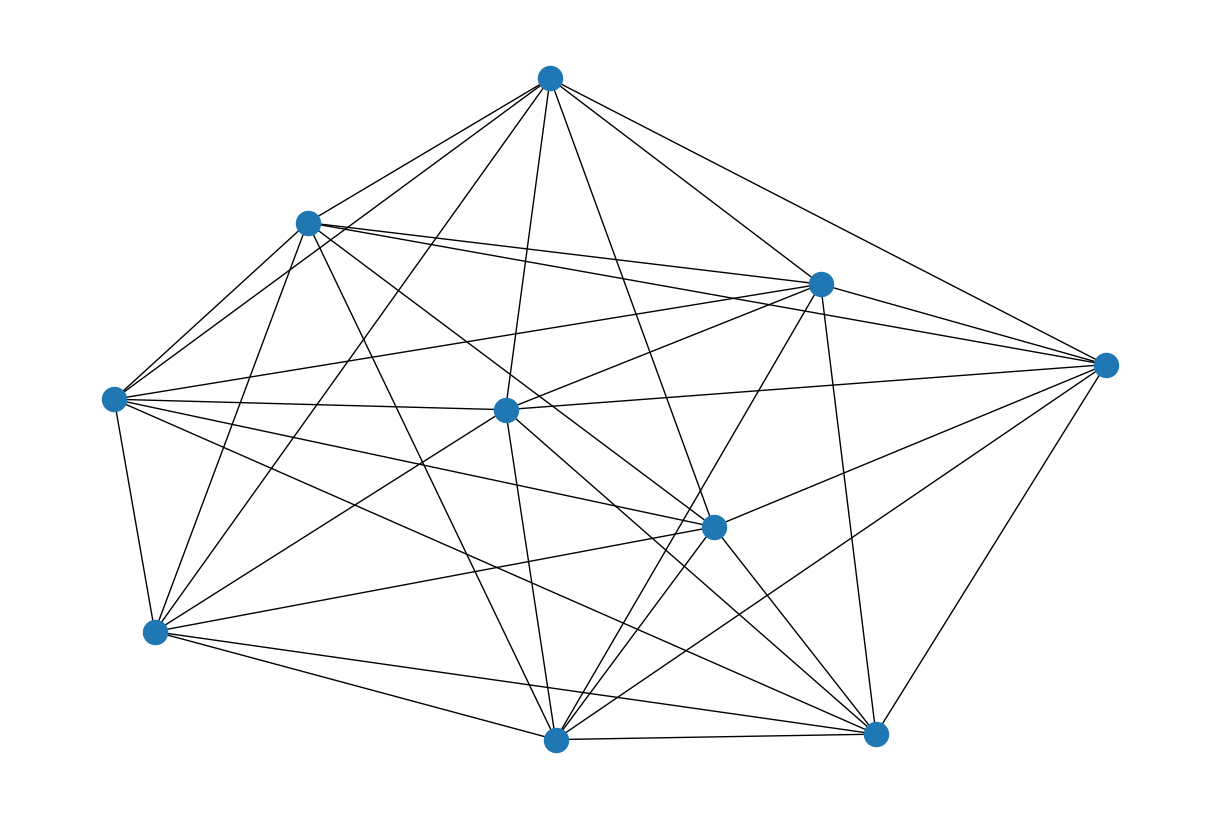

In [188]:
# primero creamos una figura con plt.figure y le damos un tamaño
plt.figure(figsize=(12, 8))

# definimos una posicion segun la cual se colocaran los nodos de forma pseudoaleatoria con una semilla
pos = nx.spring_layout(G, seed=42)

# con nx.draw dibujamos el grafo con los nodos y las conexiones
nx.draw(G,pos)

# y para finalizar mostramos el grafo con plt.show
plt.show()


### Grafo semicomplejo

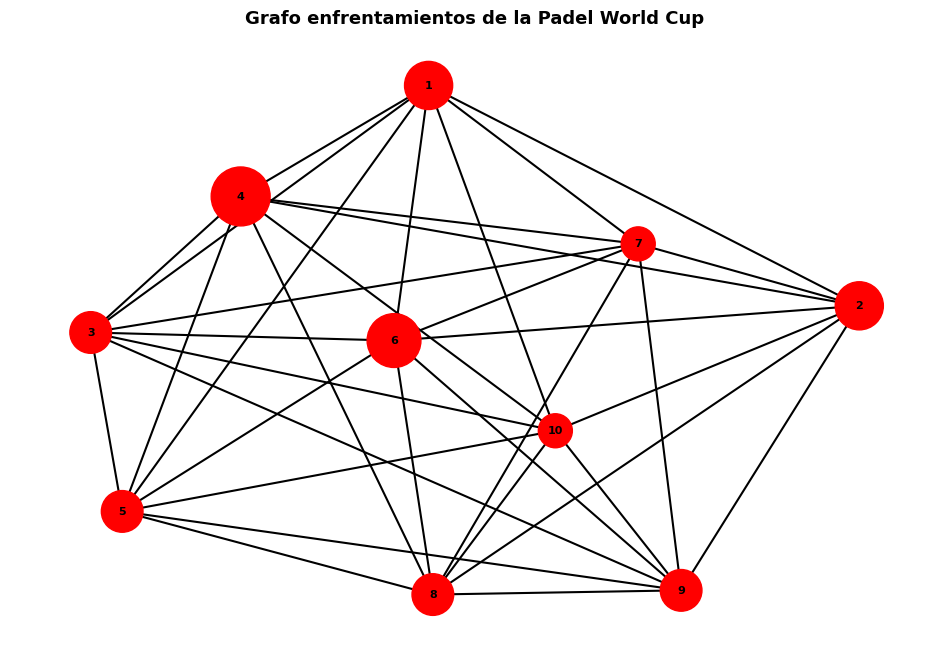

In [189]:
# para complicar un poco mas el grafo podemos añadir el ID de cada equipo, un titulo y el numero de partidos ganados que sera proporcional al tamaño del nodo
plt.figure(figsize=(12, 8))
plt.title('Grafo enfrentamientos de la Padel World Cup', fontsize=13, fontweight='bold')

pos = nx.spring_layout(G, seed=42)


# con nx.draw añadimos el grafo con los nodos y las conexiones y con las siguientes configuraciones añadimos el ID de cada equipo, el numero de partidos ganados y el tamaño del nodo sera proporcional al numero de partidos ganados

nx.draw(G, pos, 
        with_labels=True, 
        node_size=[G.nodes[i]['partidos_ganados']*300 for i in G.nodes], 
        node_color='red', 
        font_size=8, 
        font_weight='bold',
        edge_color='black',
        width=1.5)

plt.show()





### Grafo complejo

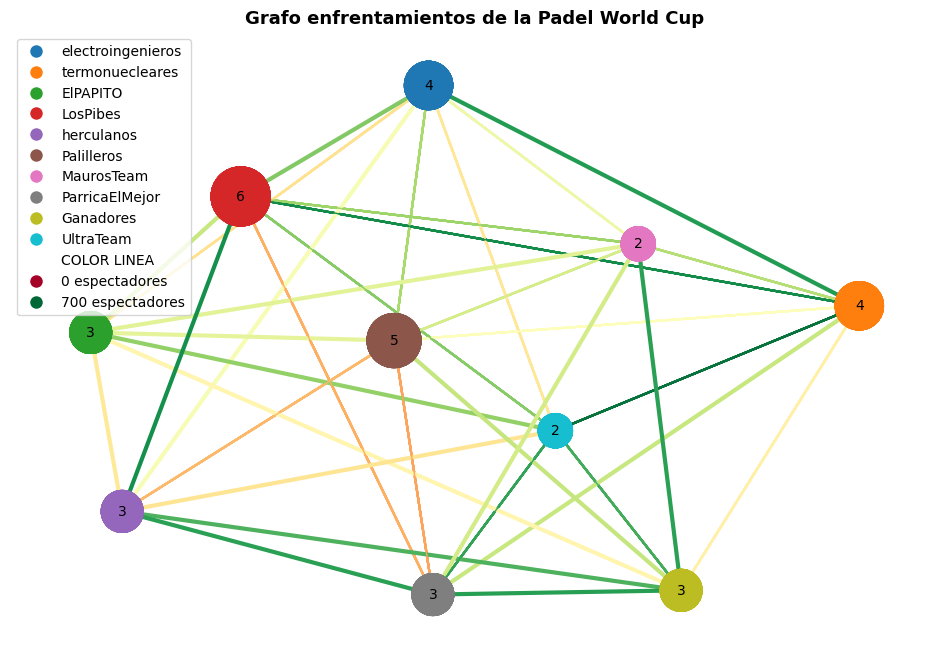

In [190]:
# por ultimo para complicar aun mas el grafo a cada nodo le asignaermos un color segun el equipo con una paleta de colores, insertaremos una leyenda con los colores de los equipos y sus nombres, cuantos mas partidos ganados tenga un equipo mas grande sera el nodo y se insertara el numero de partidos ganados en el nodo, se representara el numero de sets jugados en cada conexion dependiendo de su grosor y el numero de entradas vendidas por partido sera tambien representado por una paleta de colores de rojo a verde, rojo sera el minimo y verde el maximo de especatadores por partido

# creamos un plot para el grafo y le ponemos un titulo
plt.figure(figsize=(12, 8))
plt.title('Grafo enfrentamientos de la Padel World Cup', fontsize=13, fontweight='bold')

# definiremos dos paletas de colores, una para los equipos y otra para las entradas vendidas por partido
paleta1 = plt.cm.tab10(range(len(G.nodes)))
paleta2 = plt.cm.RdYlGn

# creamos una lista vacia de colores para insertar cada color de cada conexion dependiendo del numero de entradas vendidas por partido
color = []

# definimos una posicion segun la cual se colocaran los nodos de forma pseudoaleatoria con una semilla
pos = nx.spring_layout(G, seed=42)

# tambien definimos una lista de leyenda vacia 
leyenda = []

# por cada nodo añadimos un circulo con el color del equipo y sus partidos ganados y el nombre del equipo a la leyenda 
for i in G.nodes:

    nx.draw(G, pos,
        node_size=[G.nodes[j]['partidos_ganados']*300 for j in G.nodes], 
        node_color=paleta1, 
        font_size=8, 
        font_weight='bold',
        edge_color=color,
        width=1.5)
    
    # añadimos el numero de partidos ganados en cada nodo pasandole un diccionario con los nodos y el numero de partidos ganados
    nx.draw_networkx_labels(G, pos, labels={i: str(G.nodes[i]['partidos_ganados'])}, font_size=10)
    
    # añadimos a la leyenda el nombre del equipo y el color del equipo
    leyenda.append(plt.Line2D([0], [0], marker='o', color='w', label=G.nodes[i]['nombreEq'], markerfacecolor=paleta1[i-1], markersize=10))

# a parte de los equipos añadimos dos circulos mas a la leyenda, con el color minimo y maximo de la paleta de colores 2 segun el numero de entradas vendidas por partido
leyenda.append(plt.Line2D([0],[0], color='w', label = 'COLOR LINEA',markersize=10 ))
leyenda.append(plt.Line2D([0],[0], marker='o', color='w', label = '0 espectadores', markerfacecolor = paleta2(0),markersize=10 ))
leyenda.append(plt.Line2D([0],[0], marker='o', color='w', label = '700 espectadores', markerfacecolor = paleta2(256),markersize=10 ))

# añadimos la leyenda al plot
plt.legend(handles=leyenda, loc='upper left')

# por ultimo configuramos las conexiones, si el numero de sets jugados es 2 la linea sera mas fina y si es 3 sera mas gruesa, además el color de la linea sera segun el numero de entradas vendidas por partido 
for i, j in G.edges:
    if G.edges[(i,j)]['sets_jugados'] == 2:
        ancholinea = 1
    else:
        ancholinea = 3
    
    # en la lista de colores añadimos el color de la paleta 2 segun el numero de entradas vendidas por partido 
    color.append(paleta2(G.edges[(i,j)]['entradas_vendidas_part']/700)) 
    nx.draw_networkx_edges(G, pos, edgelist=[(i,j)], edge_color=paleta2(G.edges[(i,j)]['entradas_vendidas_part']/700), width=ancholinea)


plt.show()




# EJERCICIO 3
## random walk

{(1, 2): 29, (2, 1): 29, (1, 10): 20, (10, 1): 20, (1, 3): 32, (3, 1): 32, (3, 10): 37, (10, 3): 37, (10, 5): 21, (5, 10): 21, (5, 4): 27, (4, 5): 27, (4, 10): 43, (10, 4): 43, (3, 9): 28, (9, 3): 28, (9, 10): 32, (10, 9): 32, (3, 4): 33, (4, 3): 33, (4, 1): 28, (1, 4): 28, (2, 4): 20, (4, 2): 20, (10, 2): 30, (2, 10): 30, (2, 6): 36, (6, 2): 36, (6, 9): 36, (9, 6): 36, (9, 5): 23, (5, 9): 23, (5, 6): 23, (6, 5): 23, (6, 7): 36, (7, 6): 36, (6, 8): 31, (8, 6): 31, (5, 3): 18, (3, 5): 18, (6, 1): 39, (1, 6): 39, (2, 9): 20, (9, 2): 20, (6, 3): 26, (3, 6): 26, (9, 7): 32, (7, 9): 32, (7, 3): 38, (3, 7): 38, (10, 8): 17, (8, 10): 17, (8, 5): 26, (5, 8): 26, (1, 7): 33, (7, 1): 33, (7, 2): 32, (2, 7): 32, (1, 5): 20, (5, 1): 20, (7, 8): 33, (8, 7): 33, (8, 9): 19, (9, 8): 19, (4, 8): 37, (8, 4): 37, (8, 2): 19, (2, 8): 19, (7, 4): 26, (4, 7): 26}


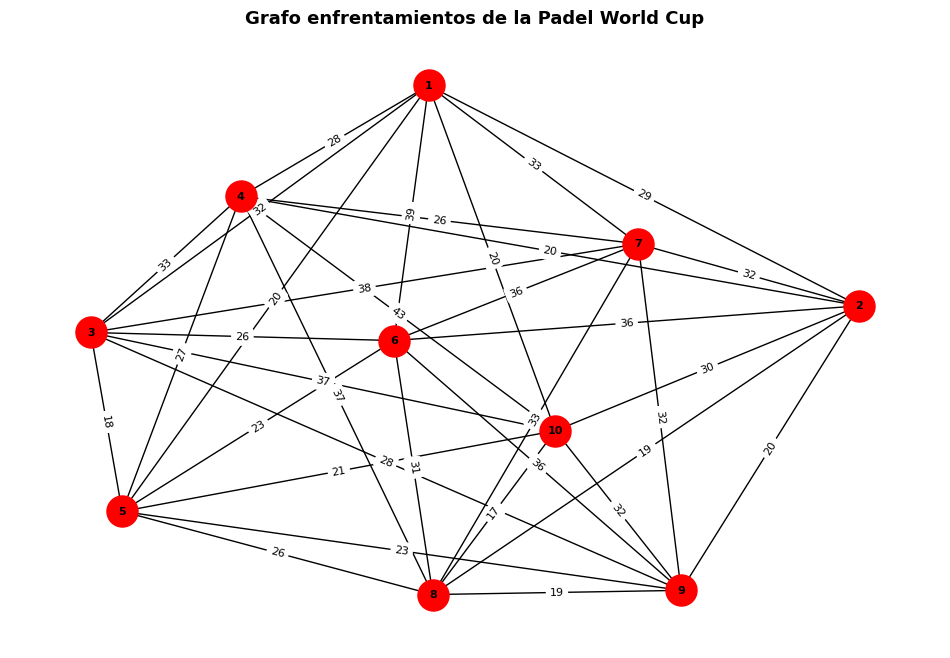

In [191]:
# Para hacer un random walk en un grafo tendria mas sentido si el grafo fuera dirigido y con pesos de probabilidad en las conexiones, pero como no es el caso, are un random walk en un grafo no dirigido y sin pesos de probabilidad en las conexiones por lo que todas las conexiones tendran la misma probabilidad de ser elegidas
# tampoco es que tenga mucho sentido hacer un random walk en un grafo de enfrentamientos 

# primero creamos una lista con los nodos del grafo
nodos = list(G.nodes)
# generamos una semilla para que el random walk sea reproducible
np.random.seed(100)

# elegimos un nodo de inicio
nodo = nodos[0]

# elegimos un numero de pasos que queramos dar
pasos = 1000

# creamos una lista donde se guardaran los nodos por los que pasamos y un diccionario donde se guardaran las veces que pasamos por una conexion
caminata = [nodo]
dicc = {}

# hacemos un bucle que recorra el numero de pasos que hemos elegido
for i in range(pasos):
    # elegimos un nodo al azar de los nodos a los que esta conectado el nodo en el que estamos
    nodo = np.random.choice([i for i in G.neighbors(nodo)])
    # añadimos el nodo a la lista de la caminata
    caminata.append(nodo)
    
# guardamos las veces que ha pasado por una conexion en un diccionario, si la conexion aun no existe en el diccionario la inicializamos a 1 y si ya existe le sumamos 1 

# como el nodo (i,j) es igual al nodo (j,i) sumaremos 1 a la conexion (i,j) y a la conexion (j,i) para que no haya confusiones

# asi al insertar los valores del diccionario en la conexion de los nodos de la visualizacion no se solaparan los numeros de los pasos en las conexiones, ya que (i,j) y (j,i) seran iguales
for i in range(len(caminata)-1):
    if (caminata[i],caminata[i+1]) in dicc:
        dicc[(caminata[i],caminata[i+1])] += 1
    else:
        dicc[(caminata[i],caminata[i+1])] = 1
    if (caminata[i+1],caminata[i]) in dicc:
        dicc[(caminata[i+1],caminata[i])] += 1
    else:
        dicc[(caminata[i+1],caminata[i])] = 1
    

# añadimos el numero de pasos que ha dado en cada conexion al grafo aunque luego no lo usaremos pero asi se guardara en el grafo
nx.set_edge_attributes(G, dicc, 'pasos') 

# mostramos el diccionario para ver cuantas veces ha pasado por cada conexion solo para comprobar que funciona
print(dicc)

# creamos un plot del grafo con las conexiones y los nodos
plt.figure(figsize=(12, 8))
plt.title('Grafo enfrentamientos de la Padel World Cup', fontsize=13, fontweight='bold')

pos = nx.spring_layout(G, seed=42)

nx.draw(G, pos, 
        with_labels=True, 
        node_size=500, 
        node_color='red', 
        font_size=8, 
        font_weight='bold',
        edge_color='black')

# y por ultimo añadimos el numero de pasos que ha dado en cada conexion
nx.draw_networkx_edge_labels(G, pos, edge_labels=dicc, font_size=8)

plt.show()




# Conclusiones

En esta sesion hemos visto como usar la libreria de NetworkX que es sin duda una de las librerias mas potentes para la inteligencia artificial ya que en base a los diferentes nodos y conexiones podemos relacionar diferentes datos, sacar conclusiones y resultados sobre estos. Ademas son la base del internet y la conexion entre servidores y paginas web, por lo que es una libreria muy importante para la informatica en general.